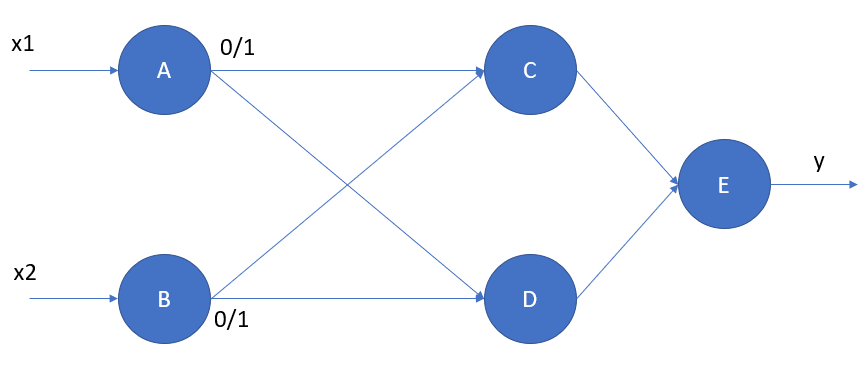

In [1]:
from IPython import display
display.Image("XOR_1.png")

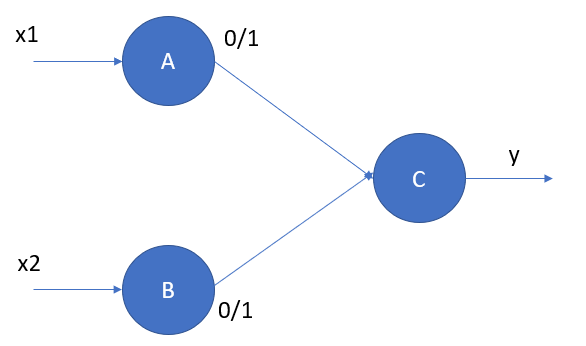

In [2]:
from IPython import display
display.Image("XOR_2.png")

In [16]:
# Simple example 
# https://towardsdatascience.com/postmortem-of-artificial-neural-networks-using-pytorch-fd429d4f5a93

import torch

# defining model architecture
class ANN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(2,2)
        self.fc2 = torch.nn.Linear(2,1)
        #self.fc2 = torch.nn.Linear(2,2)
        #self.fc3 = torch.nn.Linear(2,1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        #x = torch.sigmoid(self.fc2(x))
        #x = self.fc3(x)
        x = self.fc2(x)
        #x = torch.sigmoid(self.fc3(x))
        #x = self.fc3(x)
        return x
    
def weights_init(model):
    for m in model.modules():
        if isinstance(m, torch.nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)
            
model = ANN()
print(model)
weights_init(model)

import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
criterion = torch.nn.MSELoss()
#criterion = torch.nn.L1Loss()
#criterion = torch.nn.SmoothL1Loss()


ANN(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)


In [13]:
# setting up data
X = torch.tensor(([0, 0],[0, 1],[1, 0], [1, 1]), dtype=torch.float)
y = torch.tensor(([0], [1], [1], [0]), dtype=torch.float)
n = X.shape[0]


In [ ]:



params = list(model.parameters())
# print(params)
# print(model.fc2.weight)

print("Weight vector for layer 1")
print(params[0])
print("Bias vector for layer 1")
print(params[1])
print("Weight vector for layer 2")
print(params[2])
print("Bias vector for layer 2")
print(params[3])
print('==========================')


In [17]:
from torch.autograd import Variable
import numpy as np
epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(y[data_point], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = criterion.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
        
    if i % 500 == 0:
        print("Epoch:", i, ", Loss: ", loss.data.numpy())
print(model(X))

Epoch: 0 , Loss:  1.6049155
Epoch: 500 , Loss:  0.00023763916
Epoch: 1000 , Loss:  5.1159077e-13
Epoch: 1500 , Loss:  2.2737368e-13
Epoch: 2000 , Loss:  2.2737368e-13
tensor([[-2.3842e-07],
        [ 1.0000e+00],
        [ 1.0000e+00],
        [ 3.5763e-07]], grad_fn=<AddmmBackward>)
